In [1]:
%load_ext autoreload
%autoreload 2
import os
from pathlib import Path
from natsort import natsorted
import pandas as pd
import zarr

src_dir = os.environ.get('SRC_DIR')
import sys
if src_dir and src_dir not in sys.path:
    sys.path.append(src_dir)
from yaml_viz import views_yaml

In [2]:
repo_dir = Path(os.environ['REPO_DIR'])
data_dir = Path(os.environ['DATA_DIR'])

In [6]:
viewers = views_yaml(repo_dir / "notebooks/viz_params/0_one_experiment_all_images.yaml")

/data/etienne.doumazane/kaggle/cryoet/data/train/static/ExperimentRuns/TS_5_4/VoxelSpacing10.000/denoised.zarr


/home/etienne.doumazane/programs/miniconda3/envs/cryoet/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


/data/etienne.doumazane/kaggle/cryoet/data/train/static/ExperimentRuns/TS_5_4/VoxelSpacing10.000/ctfdeconvolved.zarr


/home/etienne.doumazane/programs/miniconda3/envs/cryoet/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


/data/etienne.doumazane/kaggle/cryoet/data/train/static/ExperimentRuns/TS_5_4/VoxelSpacing10.000/isonetcorrected.zarr


/home/etienne.doumazane/programs/miniconda3/envs/cryoet/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


/data/etienne.doumazane/kaggle/cryoet/data/train/static/ExperimentRuns/TS_5_4/VoxelSpacing10.000/wbp.zarr


/home/etienne.doumazane/programs/miniconda3/envs/cryoet/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


In [7]:
viewers = views_yaml(repo_dir / "notebooks/viz_params/1_one_image_all_experiments.yaml")

/data/etienne.doumazane/kaggle/cryoet/data/train/static/ExperimentRuns/TS_5_4/VoxelSpacing10.000/denoised.zarr


/home/etienne.doumazane/programs/miniconda3/envs/cryoet/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


/data/etienne.doumazane/kaggle/cryoet/data/train/static/ExperimentRuns/TS_6_6/VoxelSpacing10.000/denoised.zarr


/home/etienne.doumazane/programs/miniconda3/envs/cryoet/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


/data/etienne.doumazane/kaggle/cryoet/data/train/static/ExperimentRuns/TS_69_2/VoxelSpacing10.000/denoised.zarr


/home/etienne.doumazane/programs/miniconda3/envs/cryoet/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


/data/etienne.doumazane/kaggle/cryoet/data/train/static/ExperimentRuns/TS_73_6/VoxelSpacing10.000/denoised.zarr


/home/etienne.doumazane/programs/miniconda3/envs/cryoet/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


/data/etienne.doumazane/kaggle/cryoet/data/train/static/ExperimentRuns/TS_86_3/VoxelSpacing10.000/denoised.zarr


/home/etienne.doumazane/programs/miniconda3/envs/cryoet/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


/data/etienne.doumazane/kaggle/cryoet/data/train/static/ExperimentRuns/TS_99_9/VoxelSpacing10.000/denoised.zarr


/home/etienne.doumazane/programs/miniconda3/envs/cryoet/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


In [8]:
for viewer in viewers.values():
    viewer.scale_bar.visible = True
    viewer.scale_bar.unit = 'angstrom'

In [9]:
particles = pd.read_csv(data_dir / 'objects.csv')

In [12]:
colormap_cycle = ["blue", "red", "green", "yellow", "purple", "orange"]
for experiment in viewers:
    sub_particles = particles[particles.experiment == experiment]
    viewers[experiment].add_points(data=sub_particles[["z", "y", "x"]],
                                 properties=sub_particles[["x", "y", "z", "particle_type"]],
                                 name="particles",
                                 face_color="particle_type",
                                 opacity=0.8,
                                 symbol="star",
                                 border_color="#FFFFFF00",
                                 face_color_cycle=colormap_cycle,
                                 size=250,
                                 out_of_slice_display=True,)

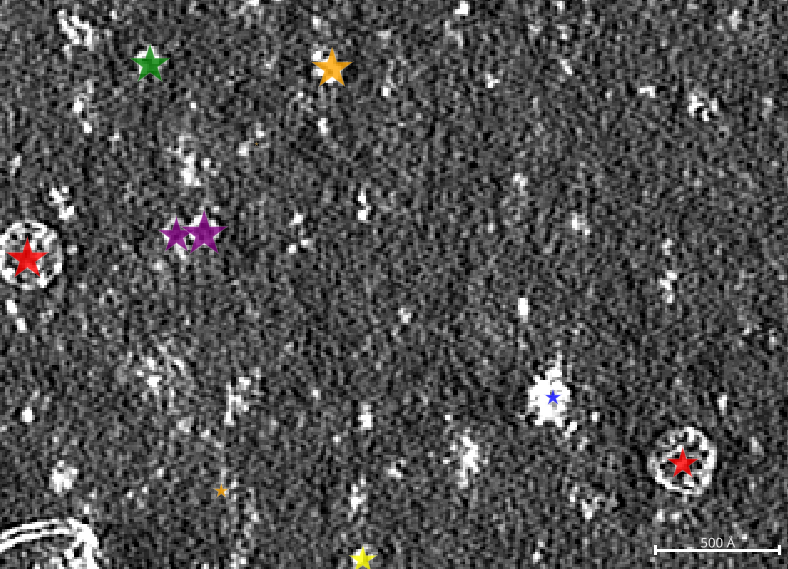